## wheat crop weed detection

# EDA (Exploratery data Analysis)

Sample annotations:
                                           file_name  class_id  \
0  camden_wheat_radish1_0_20210605_11-42-45_crop.jpg         2   
1  camden_wheat_radish1_0_20210521_13-24-35_crop.jpg         0   
2  camden_wheat_radish1_0_20210521_13-24-35_crop.jpg         3   
3  camden_wheat_radish1_0_20210625_14-03-56_crop.jpg         1   
4           camden_wheat_radish2_0_11-57-04_crop.jpg         2   

         class_name                                         bbox  width  \
0  weed (BBCH52-62)    [27.99999999999998, 590.0, 866.0, 1401.0]   2400   
1  weed (BBCH14-15)               [1065.0, 1325.0, 304.0, 268.0]   2400   
2  weed (BBCH10-13)    [225.0, 111.99999999999999, 301.0, 289.0]   2400   
3  weed (BBCH15-51)    [417.99999999999994, 814.0, 522.0, 506.0]   2400   
4  weed (BBCH52-62)  [1063.0, 372.00000000000006, 585.0, 1353.0]   2400   

   height  
0    2400  
1    2400  
2    2400  
3    2400  
4    2400  


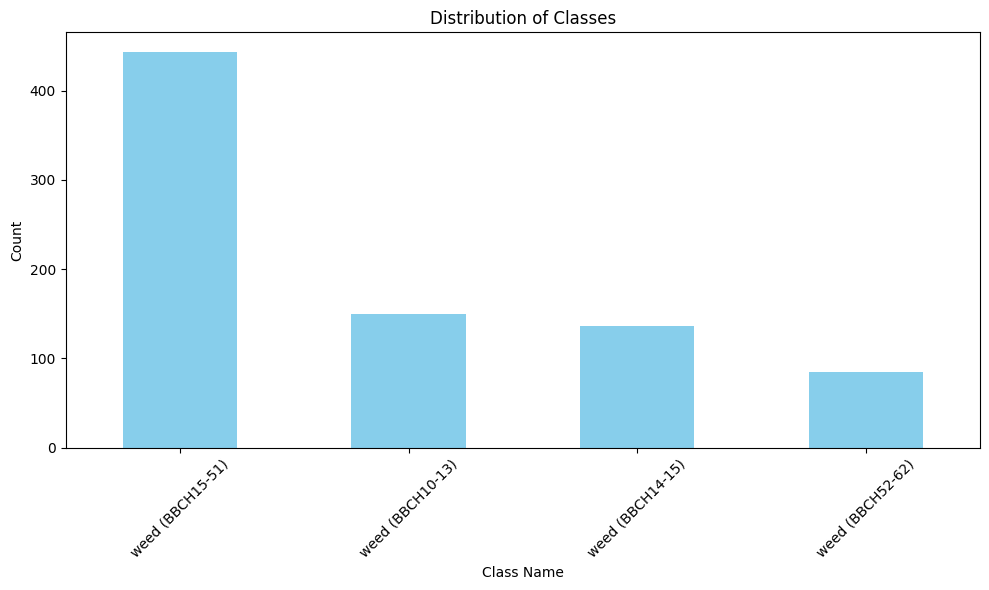

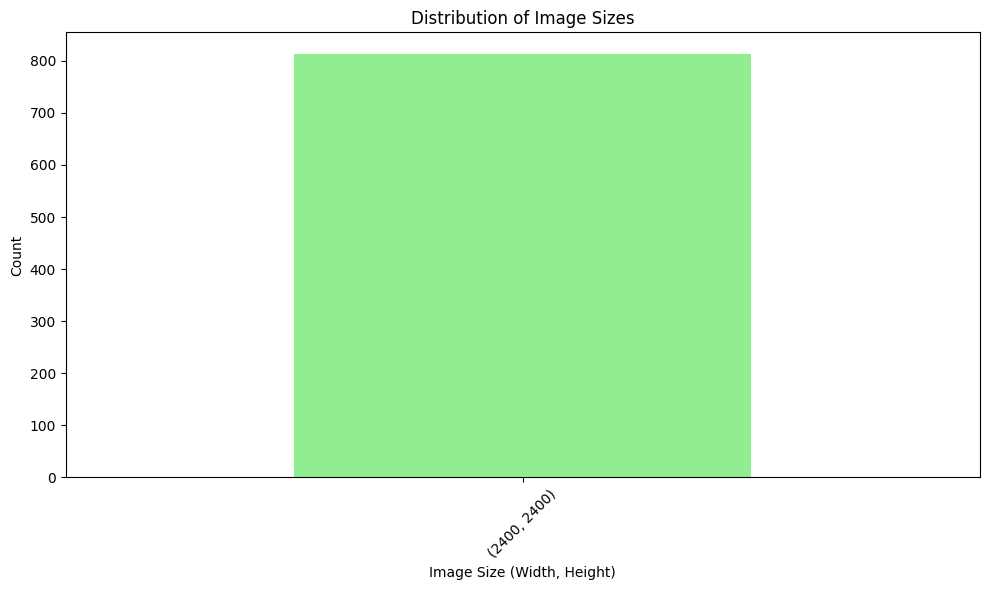

In [ ]:
import pandas as pd
# Paths to the image and label folders
image_dir = r"/content/drive/MyDrive/weed_dataset_v8/train/images"
label_dir = r"/content/drive/MyDrive/weed_dataset_v8/train/labels"
yaml_path = r"/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml"

# Load class names from YAML
with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']

# Gather all image and annotation info into DataFrame
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
annotations_list = []

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')

    img = cv2.imread(image_path)
    if img is None:
        continue

    height, width = img.shape[:2]

    if not os.path.exists(label_path):
        continue

    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                try:
                    class_id = int(parts[0])
                    x_center, y_center, w, h = map(float, parts[1:5])

                    # Convert to pixel coordinates
                    x = (x_center - w / 2) * width
                    y = (y_center - h / 2) * height
                    w *= width
                    h *= height

                    annotations_list.append({
                        "file_name": image_file,
                        "class_id": class_id,
                        "class_name": class_names[class_id],
                        "bbox": [x, y, w, h],
                        "width": width,
                        "height": height
                    })
                except:
                    continue

# Convert to DataFrame
annotations_df = pd.DataFrame(annotations_list)

# --- Display first few rows
print("Sample annotations:")
print(annotations_df.head())

# --- Class distribution
plt.figure(figsize=(10, 6))
annotations_df['class_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Visualize bounding boxes
def display_image_with_bbox(image_filename):
    image_path = os.path.join(image_dir, image_filename)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width = img.shape[:2]

    bboxes = annotations_df[annotations_df['file_name'] == image_filename]

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img_rgb)

    for _, row in bboxes.iterrows():
        x, y, w, h = row['bbox']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y - 5, row['class_name'], color='red', fontsize=9, backgroundcolor='white')

    ax.set_title(image_filename)
    plt.axis('off')
    plt.show()


# --- Image size distribution
annotations_df['image_size'] = annotations_df.apply(lambda row: (row['width'], row['height']), axis=1)
image_sizes = annotations_df['image_size'].value_counts()

image_sizes.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Distribution of Image Sizes')
plt.xlabel('Image Size (Width, Height)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import torch
torch.cuda.is_available()


True

# Training Yolo11n on Custom  Dataset

In [ ]:
from ultralytics import YOLO

# Check if CUDA (GPU) is available
device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available, otherwise fallback to CPU
print(device)
# Load a pretrained YOLOv5 model (adjust name if necessary)
model = YOLO(r"/content/drive/MyDrive/weed_dataset_v8/yolo11n (1).pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml",  # Path to dataset configuration file
    epochs=100,  # Number of training epochs
    imgsz=640,  # Image size for training
    device=device,  # Use GPU if available
)

# Evaluate the model's performance on the validation set
metrics = model.val()



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
cuda
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/weed_dataset_v8/yolo11n (1).pt, data=/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, 

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 23        [16, 19, 22]  1    431452  ultralytics.nn.modules.head.Detect           [4, [64, 128, 256]]           
YOLO11n summary: 181 layers, 2,590,620 parameters, 2,590,604 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 88.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.4 ms, read: 2.1±0.7 MB/s, size: 1054.5 KB)


train: Scanning /content/drive/MyDrive/weed_dataset_v8/train/labels.cache... 441 images, 0 backgrounds, 0 corrupt: 100%|██████████| 441/441 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 2.3±2.8 ms, read: 21.3±41.0 MB/s, size: 1109.7 KB)


val: Scanning /content/drive/MyDrive/weed_dataset_v8/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.38G      1.688      4.114      1.568         18        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        151        267    0.00921      0.922      0.136     0.0913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.78G      1.354      3.075      1.302         39        640: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        151        267      0.634      0.144      0.203      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.79G      1.261      2.615      1.236         20        640: 100%|██████████| 28/28 [00:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.00it/s]

                   all        151        267      0.478      0.128      0.217      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.79G      1.261      2.403      1.216         30        640: 100%|██████████| 28/28 [00:20<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        151        267      0.772       0.24      0.365       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.8G      1.212      2.243      1.208         19        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        151        267      0.299      0.408      0.321      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.81G        1.2      2.086      1.193         22        640: 100%|██████████| 28/28 [00:22<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        151        267       0.44      0.598      0.473      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.82G      1.146      1.999      1.192         33        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        151        267      0.311      0.405      0.338      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.84G      1.125      1.942      1.191         38        640: 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        151        267      0.302      0.331       0.32      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.85G      1.144       1.87      1.187         25        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        151        267      0.447      0.541      0.475      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.85G      1.165      1.892      1.208         32        640: 100%|██████████| 28/28 [00:20<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        151        267      0.512      0.519      0.468      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.86G      1.098      1.701      1.143         22        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        151        267      0.368      0.629      0.525      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.86G      1.149      1.706      1.211         34        640: 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        151        267      0.437      0.599      0.535      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.86G       1.07      1.604      1.151         25        640: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        151        267      0.217      0.573      0.265      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.86G      1.053      1.625      1.155         39        640: 100%|██████████| 28/28 [00:20<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.00it/s]

                   all        151        267      0.549      0.675      0.664      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.86G      1.042      1.535      1.136         30        640: 100%|██████████| 28/28 [00:20<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

                   all        151        267      0.598      0.626      0.663      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.86G     0.9897      1.513      1.121         36        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        151        267      0.611      0.599      0.632      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.86G      1.035      1.516      1.139         21        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        151        267      0.589      0.641      0.627      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.86G      1.046      1.475      1.136         23        640: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        151        267      0.571      0.683      0.684      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.86G      1.019      1.387      1.118         27        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        151        267      0.679      0.622      0.681      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.86G     0.9905      1.414       1.11         21        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        151        267      0.497      0.636      0.626      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.86G     0.9969      1.373      1.105         19        640: 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        151        267      0.436      0.664      0.577      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.86G     0.9877      1.374      1.119         22        640: 100%|██████████| 28/28 [00:22<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        151        267      0.538       0.64      0.632      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.86G     0.9852      1.349       1.11         25        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        151        267      0.575      0.668      0.676      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.86G     0.9569      1.288      1.092         26        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        151        267      0.531      0.719      0.661      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.86G     0.9349      1.251      1.091         21        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        151        267      0.598      0.552      0.602      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.86G     0.9609       1.26      1.079         31        640: 100%|██████████| 28/28 [00:20<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        151        267      0.528      0.581       0.58       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.86G     0.9841       1.32      1.103         18        640: 100%|██████████| 28/28 [00:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        151        267      0.614      0.687       0.68      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.86G     0.9826      1.286      1.119         18        640: 100%|██████████| 28/28 [00:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        151        267      0.582        0.6      0.626      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.86G      0.939       1.24      1.084         20        640: 100%|██████████| 28/28 [00:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        151        267      0.629      0.666      0.709      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.86G     0.8885      1.218      1.058         22        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        151        267      0.664      0.755       0.75      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.86G     0.9275      1.188       1.09         19        640: 100%|██████████| 28/28 [00:20<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        151        267      0.614      0.687      0.674       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.86G     0.9211      1.254      1.082         19        640: 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        151        267      0.468      0.723        0.6      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.86G     0.9233        1.2      1.079         21        640: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        151        267      0.638      0.688      0.722      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.86G     0.8921      1.152      1.068         33        640: 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        151        267      0.528      0.684      0.689      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.86G     0.8591      1.091      1.053         24        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        151        267      0.654      0.657      0.715      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.86G     0.9036      1.163      1.077         24        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        151        267      0.603      0.754      0.734      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.86G     0.8648      1.082      1.049         23        640: 100%|██████████| 28/28 [00:20<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        151        267      0.713      0.663      0.738      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.86G     0.8487      1.126      1.037         21        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        151        267      0.669      0.672      0.721      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.86G     0.8744      1.122      1.054         20        640: 100%|██████████| 28/28 [00:22<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        151        267      0.496      0.628      0.648      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.86G     0.8721      1.108      1.058         26        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        151        267      0.449      0.694      0.621      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.86G     0.8674      1.091      1.064         23        640: 100%|██████████| 28/28 [00:20<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        151        267      0.667      0.745      0.765      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.86G     0.8507      1.064      1.056         20        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        151        267      0.698      0.716      0.743      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.86G     0.8182      1.059      1.031         24        640: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        151        267      0.561      0.702      0.664      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.86G     0.8443      1.031       1.05         30        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        151        267      0.737      0.661      0.743      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.86G     0.8375      1.037      1.046         23        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        151        267      0.637      0.788       0.76      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.86G     0.7887       1.01      1.016         36        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        151        267       0.63      0.658      0.707      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.86G     0.8605      1.073      1.039         28        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        151        267      0.654      0.667      0.706      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.86G     0.8198     0.9682      1.028         24        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        151        267      0.707      0.705      0.782      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.86G     0.8547     0.9945      1.049         36        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        151        267      0.516      0.709      0.646      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.86G     0.8198      1.035      1.027         17        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        151        267      0.699       0.69      0.735      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.86G      0.822      1.023       1.04         18        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        151        267        0.5       0.67      0.623      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.87G     0.8296      1.006      1.043         29        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        151        267       0.66      0.768      0.747      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.88G     0.8031     0.9662      1.019         26        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        151        267      0.677      0.628      0.718      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.88G     0.7838     0.9792      1.006         27        640: 100%|██████████| 28/28 [00:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        151        267      0.671      0.694      0.737      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.88G     0.7926     0.9789      1.024         28        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        151        267      0.631      0.747       0.74      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.88G     0.7619      0.919     0.9961         26        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        151        267      0.736      0.691      0.787      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.88G     0.7954     0.9314      1.021         22        640: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        151        267      0.495       0.77      0.698      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.88G     0.7768     0.9174      1.016         22        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        151        267      0.702      0.687      0.762      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.88G     0.7709     0.8969      1.014         23        640: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        151        267      0.577       0.74      0.742      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.88G     0.7952     0.8778      1.015         25        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        151        267      0.672      0.785      0.772      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.88G     0.7813     0.9021      1.009         31        640: 100%|██████████| 28/28 [00:20<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        151        267      0.704       0.78      0.804      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.88G     0.7625     0.8909       1.01         32        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        151        267      0.586      0.757      0.742      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.88G     0.7837     0.9235      1.006         19        640: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        151        267      0.661       0.69      0.741      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.88G     0.7487     0.8562      0.993         23        640: 100%|██████████| 28/28 [00:22<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        151        267      0.761      0.745      0.776       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.88G       0.77     0.8693      1.007         23        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        151        267      0.639      0.813      0.807      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.88G     0.7497     0.8506     0.9996         39        640: 100%|██████████| 28/28 [00:20<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        151        267      0.717      0.727      0.769      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.88G     0.7376     0.8652      1.007         37        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        151        267      0.514      0.793      0.742      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.88G     0.7566     0.8854      0.997         28        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        151        267      0.688      0.821      0.803      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.88G     0.7209     0.8586     0.9962         26        640: 100%|██████████| 28/28 [00:22<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        151        267      0.741      0.773      0.796      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.88G       0.74     0.8389     0.9826         26        640: 100%|██████████| 28/28 [00:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        151        267      0.701      0.775      0.816      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.88G     0.7333     0.8275     0.9844         36        640: 100%|██████████| 28/28 [00:27<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        151        267      0.617      0.781      0.748      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.88G     0.7321     0.8008     0.9892         33        640: 100%|██████████| 28/28 [00:22<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        151        267      0.675      0.815      0.803      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.88G     0.7325     0.7955     0.9949         14        640: 100%|██████████| 28/28 [00:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        151        267      0.682      0.746      0.759      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.88G     0.7357     0.8054     0.9916         26        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        151        267      0.755      0.772      0.806      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.88G      0.736     0.7752      0.991         31        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        151        267      0.672      0.807      0.796      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.88G     0.7117     0.8176     0.9842         31        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        151        267      0.718       0.77      0.802      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.88G      0.731     0.8072     0.9947         29        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        151        267      0.723      0.839      0.822      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.88G     0.7042     0.7527     0.9728         23        640: 100%|██████████| 28/28 [00:22<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        151        267      0.656       0.73      0.783      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.88G     0.7272     0.8172     0.9844         18        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        151        267      0.638      0.815      0.802      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.88G     0.7174     0.7682     0.9881         20        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        151        267      0.703      0.844      0.819       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.88G     0.7187     0.7675     0.9819         15        640: 100%|██████████| 28/28 [00:20<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        151        267      0.717      0.806      0.828      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.88G      0.704     0.7632      0.977         23        640: 100%|██████████| 28/28 [00:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        151        267      0.754      0.801       0.82      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.88G     0.6873     0.7264     0.9729         22        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        151        267      0.775      0.746      0.806      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.88G     0.7128      0.765     0.9905         17        640: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        151        267      0.805      0.743      0.821      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.88G     0.6595     0.6843     0.9552         30        640: 100%|██████████| 28/28 [00:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        151        267       0.72       0.76      0.806      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.88G     0.6738     0.7081     0.9673         39        640: 100%|██████████| 28/28 [00:19<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.00it/s]

                   all        151        267      0.728      0.809      0.823      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.88G      0.675     0.7048     0.9669         21        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        151        267      0.775      0.767      0.809      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.89G     0.6901     0.7009     0.9809         18        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        151        267      0.743        0.8       0.82      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.89G     0.6541     0.6617     0.9649         25        640: 100%|██████████| 28/28 [00:26<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        151        267      0.751      0.824      0.831      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.89G     0.6909     0.7253     0.9849         24        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        151        267      0.749      0.838      0.842      0.711


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.89G     0.5996     0.6598     0.9301         15        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        151        267      0.765      0.804      0.826      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.89G     0.6224     0.6336     0.9504         13        640: 100%|██████████| 28/28 [00:22<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        151        267      0.774      0.816      0.833      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.89G     0.5784     0.6179     0.9045         16        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        151        267      0.762      0.798       0.83        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.89G     0.6045     0.6057     0.9342         19        640: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        151        267      0.763      0.799       0.82      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.89G     0.5698     0.5746     0.9142         13        640: 100%|██████████| 28/28 [00:20<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        151        267      0.761      0.814      0.838      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.89G     0.5483     0.5495     0.9117         18        640: 100%|██████████| 28/28 [00:20<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        151        267      0.768      0.808       0.83      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.89G     0.5621     0.5471     0.9014         22        640: 100%|██████████| 28/28 [00:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        151        267      0.789      0.825      0.827      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.89G     0.5601     0.5427     0.9186         11        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        151        267       0.79      0.819      0.833      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.89G     0.5501     0.5252     0.8912         13        640: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        151        267      0.792      0.813      0.831      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.89G     0.5627     0.5503     0.9055         11        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        151        267      0.791      0.807      0.831      0.705



100 epochs completed in 0.724 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]


                   all        151        267      0.749      0.839      0.842      0.711
      weed (BBCH14-15)         34         44      0.666      0.544      0.575       0.43
      weed (BBCH15-51)        110        156       0.87      0.897      0.951      0.835
      weed (BBCH52-62)         21         23      0.656      0.913      0.873      0.802
      weed (BBCH10-13)         23         44      0.803          1      0.968      0.777
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 9.5±20.7 ms, read: 270.1±213.0 MB/s, size: 1264.4 KB)


val: Scanning /content/drive/MyDrive/weed_dataset_v8/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


                   all        151        267      0.749      0.838      0.842      0.714
      weed (BBCH14-15)         34         44      0.666      0.544      0.574      0.432
      weed (BBCH15-51)        110        156      0.871      0.897      0.951      0.837
      weed (BBCH52-62)         21         23      0.656      0.912      0.873      0.802
      weed (BBCH10-13)         23         44      0.803          1      0.969      0.786
Speed: 2.0ms preprocess, 8.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2


# Saving results in drive

In [ ]:
!cp -r /content/runs/detect/ /content/drive/MyDrive/yolov11n_results_on_weed/

# Training Yolo11m on custom Dataset

In [ ]:
from ultralytics import YOLO
import torch

# Check if CUDA (GPU) is available
device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available, otherwise fallback to CPU
print(device)
# Load a pretrained YOLOv5 model (adjust name if necessary)
model = YOLO("/content/drive/MyDrive/weed_dataset_v8/yolo11m.pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml",  # Path to dataset configuration file
    epochs=100,  # Number of training epochs
    imgsz=640,  # Image size for training
    device=device,  # Use GPU if available
)

# Evaluate the model's performance on the validation set
metrics = model.val()



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
cuda
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/weed_dataset_v8/yolo11m.pt, data=/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, spli

100%|██████████| 755k/755k [00:00<00:00, 42.2MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 163MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.3 ms, read: 2.0±0.5 MB/s, size: 1054.5 KB)


train: Scanning /content/drive/MyDrive/weed_dataset_v8/train/labels.cache... 441 images, 0 backgrounds, 0 corrupt: 100%|██████████| 441/441 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.5 ms, read: 46.1±98.4 MB/s, size: 1109.7 KB)


val: Scanning /content/drive/MyDrive/weed_dataset_v8/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.96G      1.523      3.633      1.602         18        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]

                   all        151        267      0.687      0.253      0.197       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.16G      1.266      2.243      1.402         39        640: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        151        267      0.451      0.329      0.181      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.16G      1.338      2.043      1.414         20        640: 100%|██████████| 28/28 [00:25<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        151        267      0.272      0.399      0.178      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.12G      1.349      1.852      1.405         30        640: 100%|██████████| 28/28 [00:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        151        267      0.308     0.0877     0.0343     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.14G       1.31      1.825      1.415         19        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        151        267       0.25      0.223      0.188       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.12G      1.236      1.648      1.355         22        640: 100%|██████████| 28/28 [00:23<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        151        267      0.103      0.187     0.0505     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.11G      1.189      1.658      1.342         33        640: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]

                   all        151        267      0.294      0.393      0.285      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.11G      1.203      1.646      1.351         38        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        151        267      0.153      0.419      0.295      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.11G      1.214      1.619      1.356         25        640: 100%|██████████| 28/28 [00:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        151        267      0.718      0.222      0.222      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.11G      1.238       1.59      1.382         32        640: 100%|██████████| 28/28 [00:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        151        267      0.173      0.498      0.341       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.11G      1.148      1.482      1.296         22        640: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267      0.317      0.501      0.436      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.11G      1.197      1.508       1.36         34        640: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

                   all        151        267       0.29      0.409       0.32      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.11G      1.134       1.45      1.275         25        640: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        151        267      0.368      0.394      0.381      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.11G      1.097      1.466      1.297         39        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        151        267      0.261      0.554      0.425      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.11G      1.086      1.378       1.26         30        640: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        151        267      0.421      0.507      0.419      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.11G      1.093        1.4      1.278         36        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        151        267      0.308      0.559      0.439      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.11G      1.104      1.396      1.281         21        640: 100%|██████████| 28/28 [00:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267      0.655      0.484      0.526      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.14G      1.099      1.399      1.281         23        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        151        267      0.369      0.493      0.422      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.11G      1.017      1.304      1.235         27        640: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        151        267      0.733      0.402      0.444      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.11G      1.022      1.287      1.246         21        640: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        151        267      0.414      0.513      0.491       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.11G      1.021      1.278      1.212         19        640: 100%|██████████| 28/28 [00:25<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        151        267      0.509      0.537       0.52      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.11G      1.037      1.314      1.264         22        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        151        267      0.608      0.571      0.526      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.13G      1.023      1.274      1.239         25        640: 100%|██████████| 28/28 [00:25<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        151        267      0.491      0.602      0.566      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.11G     0.9888      1.205      1.214         26        640: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        151        267      0.478      0.464      0.494      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.11G     0.9684      1.178      1.186         21        640: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]

                   all        151        267       0.49      0.516      0.577      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.11G     0.9747      1.211      1.174         31        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        151        267      0.633      0.533      0.545      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.11G     0.9992      1.259       1.22         18        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        151        267      0.575      0.582      0.617      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.12G     0.9945      1.209      1.222         18        640: 100%|██████████| 28/28 [00:24<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        151        267      0.352      0.654      0.588      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.13G     0.9532      1.219      1.197         20        640: 100%|██████████| 28/28 [00:24<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        151        267      0.493      0.607      0.593      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.11G     0.9077       1.18      1.159         22        640: 100%|██████████| 28/28 [00:25<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        151        267       0.53       0.57      0.569      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.13G     0.9405      1.141      1.196         19        640: 100%|██████████| 28/28 [00:23<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        151        267      0.374      0.575      0.504      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.14G     0.9494      1.216      1.206         19        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        151        267      0.554      0.592      0.631      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.13G     0.9472      1.169      1.184         21        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        151        267      0.573      0.713      0.675      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.11G     0.9052      1.082       1.15         33        640: 100%|██████████| 28/28 [00:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        151        267      0.503      0.671      0.584      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.11G     0.8583       1.08      1.148         24        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267      0.594      0.624      0.645      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.11G     0.9174      1.163       1.18         24        640: 100%|██████████| 28/28 [00:25<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267      0.602      0.598      0.667      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.11G     0.8838      1.059       1.14         23        640: 100%|██████████| 28/28 [00:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        151        267       0.53      0.747      0.683      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.11G     0.8544      1.102      1.134         21        640: 100%|██████████| 28/28 [00:22<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]

                   all        151        267       0.61      0.638      0.654      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.11G      0.872      1.079      1.162         20        640: 100%|██████████| 28/28 [00:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        151        267      0.613      0.677      0.686      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.11G     0.8785      1.082      1.152         26        640: 100%|██████████| 28/28 [00:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        151        267      0.348       0.47      0.447      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.11G     0.8777      1.088      1.166         23        640: 100%|██████████| 28/28 [00:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        151        267      0.552       0.63      0.647      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.11G     0.8634      1.047      1.146         20        640: 100%|██████████| 28/28 [00:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        151        267      0.733      0.662      0.751      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.11G     0.8252      1.006      1.118         24        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        151        267      0.355      0.679      0.491      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.11G     0.8716      1.028      1.162         30        640: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        151        267      0.559      0.671      0.685      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.11G     0.8146     0.9935      1.111         23        640: 100%|██████████| 28/28 [00:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        151        267       0.56       0.69       0.67      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.11G     0.7924      0.977      1.104         36        640: 100%|██████████| 28/28 [00:25<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        151        267      0.418      0.572      0.538      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.11G     0.8415      1.009      1.114         28        640: 100%|██████████| 28/28 [00:26<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

                   all        151        267      0.508      0.639      0.594      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.11G     0.8028     0.9326      1.098         24        640: 100%|██████████| 28/28 [00:24<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

                   all        151        267      0.499       0.56      0.563      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.11G     0.8321     0.9552      1.133         36        640: 100%|██████████| 28/28 [00:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        151        267      0.506      0.611      0.583      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.11G     0.8364     0.9902      1.131         17        640: 100%|██████████| 28/28 [00:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        151        267      0.621      0.685      0.714      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.13G     0.8138     0.9603      1.114         18        640: 100%|██████████| 28/28 [00:26<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        151        267      0.463       0.74       0.65      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.11G     0.8392     0.9998      1.126         29        640: 100%|██████████| 28/28 [00:24<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.00it/s]

                   all        151        267      0.689      0.691      0.739      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.14G       0.83     0.9499      1.116         26        640: 100%|██████████| 28/28 [00:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        151        267      0.566      0.714      0.676      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.13G     0.7834     0.9411      1.094         27        640: 100%|██████████| 28/28 [00:26<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267        0.6      0.677      0.698      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.11G     0.7896     0.9313      1.102         28        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        151        267      0.662      0.699      0.669      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.11G     0.7688     0.8698      1.073         26        640: 100%|██████████| 28/28 [00:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        151        267      0.502      0.677      0.632      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.13G     0.7883     0.8767      1.117         22        640: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        151        267      0.642      0.785      0.727      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.11G     0.7751     0.8624      1.094         22        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

                   all        151        267      0.629      0.771      0.723      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.11G     0.7828     0.8529      1.103         23        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        151        267      0.663      0.628      0.719      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.11G     0.7978     0.8482      1.093         25        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        151        267      0.622      0.771      0.757      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.13G     0.7749     0.8534      1.086         31        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267      0.672      0.664      0.731      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.11G      0.749     0.8274      1.079         32        640: 100%|██████████| 28/28 [00:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        151        267      0.659      0.678      0.715      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.11G     0.7439     0.8876      1.059         19        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        151        267       0.59      0.773      0.733      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.11G     0.7277     0.8333      1.067         23        640: 100%|██████████| 28/28 [00:24<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        151        267      0.569      0.639      0.623      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.11G     0.7632     0.8641      1.076         23        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        151        267      0.743      0.679      0.772      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.14G     0.7338     0.8238      1.065         39        640: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        151        267      0.722      0.732      0.795       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.11G     0.7433     0.8374      1.084         37        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        151        267      0.645       0.64      0.719       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.11G     0.7471     0.8464      1.074         28        640: 100%|██████████| 28/28 [00:25<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

                   all        151        267      0.723      0.621       0.74      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.11G     0.7239     0.8336      1.075         26        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        151        267       0.58      0.758      0.731      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.11G     0.7063     0.7658      1.045         26        640: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]

                   all        151        267      0.635      0.704      0.698      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.11G     0.7021     0.7639      1.043         36        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        151        267      0.707      0.698      0.742      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.11G     0.7145     0.7662      1.061         33        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        151        267      0.713      0.759      0.763      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.11G     0.7113     0.7569      1.051         14        640: 100%|██████████| 28/28 [00:25<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        151        267      0.714      0.781       0.79      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.11G     0.7232     0.7713      1.062         26        640: 100%|██████████| 28/28 [00:24<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267      0.621      0.759      0.725      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.11G     0.7237     0.7488      1.066         31        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        151        267      0.668       0.76      0.752      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.14G     0.6787     0.7351      1.046         31        640: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        151        267      0.699      0.751      0.769      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.13G     0.7332     0.7644      1.074         29        640: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        151        267      0.681       0.72      0.745      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.11G     0.6883     0.7476      1.037         23        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        151        267      0.541      0.781      0.658      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.11G     0.7123     0.7626      1.069         18        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        151        267      0.704      0.781      0.804      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.11G     0.7114     0.7248      1.066         20        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

                   all        151        267      0.681      0.776       0.78      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.12G     0.6933     0.6873      1.044         15        640: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267      0.681      0.782      0.763      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.11G     0.6675     0.6669      1.034         23        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        151        267       0.69      0.761      0.759      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.11G     0.6616     0.6617      1.035         22        640: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        151        267      0.694      0.744       0.76      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.11G     0.6794     0.6931      1.051         17        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        151        267      0.592        0.8      0.753       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.11G     0.6429     0.6483      1.014         30        640: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        151        267       0.66      0.796      0.794      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.11G     0.6424     0.6553       1.02         39        640: 100%|██████████| 28/28 [00:24<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        151        267      0.646      0.822      0.779       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.11G     0.6324      0.665      1.029         21        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        151        267      0.763      0.771      0.827      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.12G     0.6623     0.6656      1.045         18        640: 100%|██████████| 28/28 [00:25<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        151        267      0.706      0.751      0.764      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.11G     0.6212     0.6309      1.027         25        640: 100%|██████████| 28/28 [00:25<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        151        267      0.693       0.83      0.818      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.11G     0.6517      0.664      1.036         24        640: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        151        267      0.756      0.773        0.8      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.12G     0.5891     0.5755      1.008         15        640: 100%|██████████| 28/28 [00:29<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

                   all        151        267      0.726      0.794      0.809      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.12G     0.6095     0.5923      1.027         13        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        151        267      0.671      0.812      0.795       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.12G     0.5632      0.553     0.9841         16        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        151        267      0.708      0.814      0.813      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.11G     0.5857     0.5415      1.013         19        640: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        151        267      0.746      0.768      0.806      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.11G     0.5566     0.5292      0.976         13        640: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        151        267      0.741      0.791      0.804      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.12G     0.5653     0.5121     0.9965         18        640: 100%|██████████| 28/28 [00:23<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        151        267      0.762       0.78      0.818      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.11G       0.55     0.4976     0.9843         22        640: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        151        267      0.772      0.756      0.811      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.12G     0.5417     0.4985     0.9829         11        640: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        151        267      0.771      0.784      0.809      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.12G     0.5289     0.4629     0.9641         13        640: 100%|██████████| 28/28 [00:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        151        267      0.775      0.772      0.812      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.12G     0.5462     0.4669     0.9866         11        640: 100%|██████████| 28/28 [00:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        151        267      0.762      0.773      0.817      0.675



100 epochs completed in 0.870 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


                   all        151        267      0.762      0.774      0.817      0.673
      weed (BBCH14-15)         34         44       0.61      0.432      0.545      0.388
      weed (BBCH15-51)        110        156      0.862      0.884      0.948      0.838
      weed (BBCH52-62)         21         23      0.686       0.87      0.802      0.667
      weed (BBCH10-13)         23         44       0.89      0.909      0.973        0.8
Speed: 0.3ms preprocess, 13.5ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 1.8±3.3 ms, read: 261.5±170.5 MB/s, size: 1264.4 KB)


val: Scanning /content/drive/MyDrive/weed_dataset_v8/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


                   all        151        267      0.762      0.773      0.817      0.671
      weed (BBCH14-15)         34         44       0.61      0.432      0.546      0.388
      weed (BBCH15-51)        110        156      0.862      0.883      0.947      0.838
      weed (BBCH52-62)         21         23      0.686       0.87      0.803      0.668
      weed (BBCH10-13)         23         44      0.891      0.909      0.972      0.791
Speed: 3.2ms preprocess, 24.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2


# Saving Training results of YOLOv11m

In [ ]:
!cp -r /content/runs/detect/ /content/drive/MyDrive/yolov11m_results_on_weed/

# Benchmarking of Yolo11n trained weights

In [ ]:
from ultralytics import YOLO
import torch

# Load the best trained model
model = YOLO("/content/yolo_11n_trained.pt")  # Update path if different

# Evaluate the model on test set
metrics = model.val(data="/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml", split="test")

# Extract mean results
precision, recall, mAP50, mAP50_95 = metrics.box.mean_results()
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"mAP@0.5: {mAP50:.4f}")
print(f"mAP@0.5:0.95: {mAP50_95:.4f}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 19.7MB/s]
val: Scanning /content/drive/MyDrive/weed_dataset_v8/test/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.45s/it]


                   all         56        105      0.759      0.842      0.856      0.723
      weed (BBCH14-15)         11         17       0.66      0.571      0.562      0.432
      weed (BBCH15-51)         37         55      0.837      0.932      0.949       0.81
      weed (BBCH52-62)         10         11      0.726      0.909      0.935      0.858
      weed (BBCH10-13)         11         22      0.815      0.955      0.978      0.793
Speed: 8.3ms preprocess, 7.8ms inference, 0.0ms loss, 9.8ms postprocess per image
Results saved to runs/detect/val
Precision: 0.7592
Recall: 0.8417
F1-score: 0.7983
mAP@0.5: 0.8562
mAP@0.5:0.95: 0.7233


# Benchmarking of Yolo11m trained weights

In [ ]:
from ultralytics import YOLO
import torch

# Load the best trained model
model = YOLO("/content/Yolo_11m_weights.pt")  # Update path if different

# Evaluate the model on test set
metrics = model.val(data="/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml", split="test")

# Extract mean results
precision, recall, mAP50, mAP50_95 = metrics.box.mean_results()
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"mAP@0.5: {mAP50:.4f}")
print(f"mAP@0.5:0.95: {mAP50_95:.4f}")


Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /content/drive/MyDrive/weed_dataset_v8/test/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:15<00:00, 33.87s/it]


                   all         56        105       0.79      0.775      0.845      0.699
      weed (BBCH14-15)         11         17      0.645      0.294      0.556      0.425
      weed (BBCH15-51)         37         55       0.92      0.927      0.969      0.888
      weed (BBCH52-62)         10         11      0.765          1      0.916       0.74
      weed (BBCH10-13)         11         22      0.829      0.879       0.94      0.744
Speed: 8.9ms preprocess, 2317.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2
Precision: 0.7897
Recall: 0.7752
F1-score: 0.7824
mAP@0.5: 0.8450
mAP@0.5:0.95: 0.6991


# Predictions on Yolo11n


image 1/1 /content/camden_wheat_radish1_0_20210421_11-47-50_crop.jpg: 640x640 1 weed (BBCH52-62), 36.9ms
Speed: 3.8ms preprocess, 36.9ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


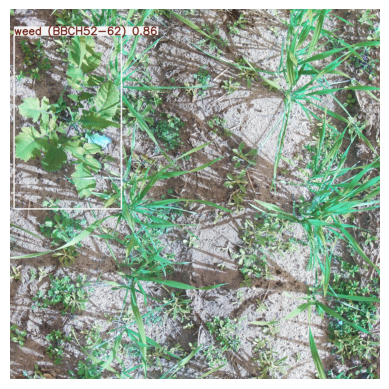

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained YOLO model
model = YOLO("/content/Yolo_11m_weights.pt")

# Perform prediction on the image with higher confidence and tuned IoU to reduce overlaps
results = model("/content/camden_wheat_radish1_0_20210421_11-47-50_crop.jpg", conf=0.2, iou=0.3)  # You can tweak conf/iou if needed

# Get the output image with the predictions overlaid
output_image = results[0].plot()  # This will give you the image with detections

# Convert the numpy array to a PIL Image
output_image_pil = Image.fromarray(output_image)

# Resize the image to a medium size (e.g., 1200x1200)
output_image_pil = output_image_pil.resize((1200, 1200))

# Use matplotlib to display the image correctly in a Jupyter notebook
plt.imshow(output_image_pil)
plt.axis('off')  # Hide axis labels for clarity
plt.show()


#Inferencing on vedio using YOLOv11n

In [ ]:
#Class detection code in video

import cv2
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO(r"/content/drive/MyDrive/yolov11n_results_on_weed/train/weights/best.pt")

# Open the video file
input_video_path = r"/content/weed21.mp4"
cap = cv2.VideoCapture(input_video_path)

# Get video information (frame width, height, and FPS)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to save the processed video
output_video_path = "/content/output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for saving output video
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

frame_count = 0  # To track the number of frames processed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform prediction on the current frame
    results = model(frame)

    # Get the output frame with the predictions overlaid
    output_frame = results[0].plot()  # This gives you the frame with detections

    # Write the frame to the output video
    out.write(output_frame)

    frame_count += 1
    # Print progress in the terminal
    print(f"Processing frame {frame_count}...", end='\r')

# Release the video capture and writer objects
cap.release()
out.release()

print("\nVideo processing complete!")
print(f"Processed video saved as {output_video_path}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 384x640 1 weed (BBCH10-13), 385.3ms
Speed: 21.2ms preprocess, 385.3ms inference, 28.6ms postprocess per image at shape (1, 3, 384, 640)
Processing frame 1...
0: 384x640 1 weed (BBCH10-13), 185.5ms
Speed: 4.8ms preprocess, 185.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Processing frame 2...
0: 384x640 (no detections), 132.3ms
Speed: 4.4ms preprocess, 132.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 weed (BBCH10-13), 122.0ms
Speed: 6.0ms preprocess, 122.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Processing frame 4...
0: 384x640 (no detections), 123.8ms
Speed: 6.1ms preprocess, 123.8ms infer

# Predictions on Yolo11m


image 1/1 /content/camden_wheat_radish1_0_20210521_12-47-53_crop.jpg: 640x640 2 weed (BBCH15-51)s, 36.8ms
Speed: 3.5ms preprocess, 36.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


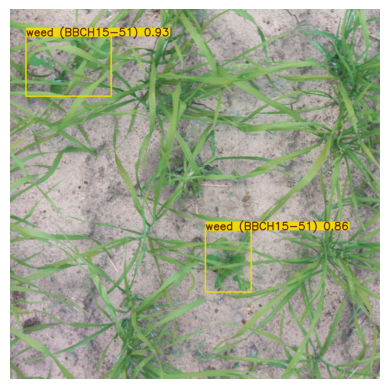

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained YOLO model
model = YOLO("/content/Yolo_11m_weights.pt")

# Perform prediction on the image with higher confidence and tuned IoU to reduce overlaps
results = model("/content/camden_wheat_radish1_0_20210521_12-47-53_crop.jpg", conf=0.2, iou=0.3)  # You can tweak conf/iou if needed

# Get the output image with the predictions overlaid
output_image = results[0].plot()  # This will give you the image with detections

# Convert the numpy array to a PIL Image
output_image_pil = Image.fromarray(output_image)

# Resize the image to a medium size (e.g., 1200x1200)
output_image_pil = output_image_pil.resize((1200, 1200))

# Use matplotlib to display the image correctly in a Jupyter notebook
plt.imshow(output_image_pil)
plt.axis('off')  # Hide axis labels for clarity
plt.show()


# Training YOLO v11x

In [ ]:

from ultralytics import YOLO
import torch

# Check if CUDA (GPU) is available
device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available, otherwise fallback to CPU
print(device)
# Load a pretrained YOLOv5 model (adjust name if necessary)
model = YOLO(r"/content/drive/MyDrive/weed_dataset_v8/yolo11x.pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml",  # Path to dataset config
    epochs=100,  # Number of epochs
    imgsz=640,  # Image size
    batch=8,  # Batch size (reduce this if OOM continues, e.g., 8 or 4)
    device=device,  # GPU or CPU
)


# Evaluate the model's performance on the validation set
metrics = model.val()



cuda
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/weed_dataset_v8/yolo11x.pt, data=/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/drive/MyDrive/weed_dataset_v8/train/labels.cache... 441 images, 0 backgrounds, 0 corrupt: 100%|██████████| 441/441 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 181.3±79.2 MB/s, size: 1109.7 KB)


val: Scanning /content/drive/MyDrive/weed_dataset_v8/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.05G      1.468      3.367      1.627          1        640: 100%|██████████| 56/56 [00:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


                   all        151        267    0.00818      0.616     0.0126    0.00811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.52G      1.571      2.766      1.677          2        640: 100%|██████████| 56/56 [00:36<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        151        267    0.00127     0.0538   0.000473   0.000228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.52G       1.58      2.421      1.616          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]

                   all        151        267          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.51G      1.633      2.284      1.665          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        151        267        0.5     0.0016   8.88e-06   3.85e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       8.5G      1.504      2.068      1.594          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

                   all        151        267      0.713       0.25      0.222      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.52G      1.487      2.097      1.566          5        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        151        267      0.525      0.277      0.337      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       8.5G      1.342      1.941      1.462          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        151        267      0.775      0.273      0.343      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       8.5G      1.348      1.973      1.506          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        151        267      0.735      0.272      0.312      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.49G      1.291      1.917      1.455          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        151        267       0.78      0.262      0.349      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.49G      1.326      1.868       1.46          5        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        151        267      0.832        0.3      0.409      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.49G      1.262      1.773      1.434          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        151        267      0.357      0.491      0.447      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       8.5G      1.273      1.839      1.454          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        151        267      0.369       0.58       0.53       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       8.5G       1.15      1.795      1.338          0        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        151        267      0.464      0.444      0.494       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       8.5G      1.163      1.667      1.371          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        151        267       0.29      0.639      0.501      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       8.5G      1.102      1.559      1.336          6        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        151        267      0.338      0.684      0.509      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       8.5G       1.12      1.518      1.324          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        151        267      0.668       0.52      0.549      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.49G      1.137      1.507      1.345          4        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        151        267      0.463      0.636       0.57      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       8.5G      1.151      1.559      1.347          6        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        151        267      0.402      0.575      0.517      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.49G      1.094       1.55      1.307          5        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        151        267      0.444      0.517      0.519      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       8.5G       1.06      1.464      1.317          5        640: 100%|██████████| 56/56 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        151        267      0.438      0.556      0.532      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       8.5G      1.073      1.546      1.293          0        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        151        267      0.435      0.627      0.578      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       8.5G        1.1      1.534      1.327          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        151        267       0.36      0.689      0.571      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.49G      1.095      1.463      1.301          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        151        267      0.402      0.665      0.598      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       8.5G      1.066      1.432      1.276          5        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]

                   all        151        267       0.56      0.572      0.632      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.49G      1.021      1.388      1.255          6        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        151        267      0.471      0.607      0.582      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.49G       1.06       1.44      1.269          6        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        151        267      0.442      0.648      0.545      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       8.5G       1.04      1.347      1.304          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        151        267      0.408      0.639      0.599      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.49G      1.003      1.311      1.244          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        151        267      0.539      0.557      0.597       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.49G      1.032      1.326        1.3          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        151        267      0.422      0.587       0.52      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       8.5G     0.9965      1.345       1.26          4        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        151        267      0.454      0.628      0.606      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       8.5G     0.9526      1.367      1.202          0        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        151        267      0.404      0.645       0.57      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       8.5G     0.9961      1.314      1.237          5        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        151        267      0.493       0.67       0.64      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       8.5G     0.9891      1.302      1.241          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        151        267       0.56      0.611      0.612      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       8.5G       0.92      1.256      1.189          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]

                   all        151        267      0.423      0.467      0.498       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.49G     0.9612      1.258       1.23          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        151        267      0.461       0.56      0.579      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       8.5G     0.9628      1.254      1.239          7        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        151        267      0.545      0.683      0.641      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       8.5G     0.9223      1.219      1.193          9        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        151        267       0.72      0.544      0.588      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.49G     0.9115      1.216      1.202          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        151        267      0.576      0.542       0.58      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.49G     0.8682       1.16      1.195          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        151        267       0.51      0.684      0.641      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       8.5G     0.9218      1.184      1.191          4        640: 100%|██████████| 56/56 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        151        267      0.526      0.564      0.645       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.49G     0.9065       1.16      1.209          2        640: 100%|██████████| 56/56 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        151        267       0.63      0.618      0.666      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.49G     0.9117      1.219      1.191          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        151        267      0.547      0.598      0.612      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.49G     0.8749      1.208      1.173          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        151        267      0.457      0.778      0.643      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.49G     0.9236       1.14      1.221          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        151        267      0.469      0.507      0.538      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.49G     0.8718      1.154      1.183          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]

                   all        151        267      0.489      0.692      0.613      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.49G     0.8985       1.19      1.186          5        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        151        267      0.617      0.659      0.671      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.49G     0.8848      1.177      1.184          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        151        267      0.598      0.633      0.658      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.49G     0.8688      1.093      1.167          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        151        267      0.534      0.676      0.643       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.49G     0.8841      1.129      1.183          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        151        267      0.525      0.642      0.646      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.49G     0.9046      1.121      1.203          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        151        267      0.549      0.624      0.638      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.49G     0.8558      1.078      1.166          1        640: 100%|██████████| 56/56 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        151        267      0.509      0.641      0.601      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.49G      0.864      1.091      1.172          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        151        267      0.428      0.553      0.494      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.49G     0.8603        1.1      1.163          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        151        267      0.568      0.553      0.614      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.49G     0.8266      1.052      1.146          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        151        267      0.597      0.675      0.697      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.49G     0.8373      1.043      1.136          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        151        267       0.54      0.578      0.641      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       8.5G      0.753     0.9654      1.101          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]

                   all        151        267      0.595      0.722      0.721      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.49G     0.8417      1.031      1.158          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        151        267      0.507      0.589      0.581      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.49G     0.8034     0.9925      1.128          3        640: 100%|██████████| 56/56 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        151        267      0.681      0.614      0.701      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.49G     0.8245      1.042      1.138          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        151        267      0.654      0.633      0.676      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       8.5G     0.7844      1.026      1.137          3        640: 100%|██████████| 56/56 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        151        267      0.424        0.6      0.538      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.49G     0.7768      1.011      1.129          3        640: 100%|██████████| 56/56 [00:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        151        267      0.575      0.678      0.691      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.49G     0.7696      1.004      1.133          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        151        267      0.596      0.687      0.681      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.49G     0.7721      1.009      1.113          0        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        151        267      0.389      0.538      0.477      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.49G     0.7667     0.9485      1.096          4        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        151        267      0.557      0.713      0.707      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.49G      0.783     0.9712      1.121          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        151        267      0.399      0.677      0.549      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.49G     0.8008      1.028      1.135          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        151        267      0.683      0.657       0.72      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.48G     0.7601     0.9824      1.111          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        151        267      0.447      0.704      0.606      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.49G     0.7706     0.9578      1.087          4        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        151        267      0.593      0.698      0.708      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       8.5G     0.8011     0.9732      1.127          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        151        267      0.497      0.717      0.671      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.49G     0.7486     0.9155      1.106          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        151        267      0.586      0.634      0.645      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.48G     0.7295     0.9063        1.1          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        151        267       0.66      0.685      0.726      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.49G     0.7189     0.8933      1.098          6        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

                   all        151        267      0.676      0.591      0.707      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       8.5G     0.7086     0.8705      1.077          0        640: 100%|██████████| 56/56 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        151        267      0.637      0.643      0.674      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.49G     0.7714     0.9309      1.112          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        151        267      0.613      0.684      0.701      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.49G     0.7233     0.8725       1.09          3        640: 100%|██████████| 56/56 [00:36<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        151        267      0.571      0.663      0.686      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       8.5G     0.7166     0.8684      1.076          5        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

                   all        151        267       0.66       0.64       0.71       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.49G     0.7605     0.9045      1.105          3        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        151        267      0.606      0.735       0.72      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.52G     0.7151     0.8243      1.085          9        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

                   all        151        267      0.554      0.638      0.654      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       8.5G     0.6781     0.8215      1.038          0        640: 100%|██████████| 56/56 [00:37<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        151        267      0.617      0.657      0.654      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.49G     0.7586     0.8367      1.119          1        640: 100%|██████████| 56/56 [00:37<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        151        267      0.552      0.675      0.618      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.49G     0.7096      0.812      1.077          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        151        267      0.663      0.687      0.721      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       8.5G     0.6872     0.8022      1.074          2        640: 100%|██████████| 56/56 [00:36<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

                   all        151        267      0.663      0.741      0.774      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.49G     0.6884     0.7772      1.063          1        640: 100%|██████████| 56/56 [00:37<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        151        267      0.645      0.552      0.655      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.49G     0.6807     0.7749      1.072          5        640: 100%|██████████| 56/56 [00:37<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]

                   all        151        267      0.643       0.59      0.691      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.49G     0.6709     0.7634      1.047          7        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        151        267      0.536      0.673      0.664      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.49G     0.6838     0.7458      1.074          4        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        151        267      0.601      0.684      0.724      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.49G     0.6804     0.7335      1.067          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        151        267      0.595      0.713      0.725      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.49G      0.709     0.7693      1.102          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        151        267      0.674      0.613      0.712      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.49G     0.6628     0.7183      1.039          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        151        267      0.584      0.741       0.71      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.49G     0.6804     0.7728       1.07          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        151        267      0.642      0.637       0.69       0.57


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.49G     0.6087     0.7085      1.026          2        640: 100%|██████████| 56/56 [00:36<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        151        267      0.691      0.709      0.735      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.49G     0.6121     0.6758      1.039          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        151        267      0.692      0.715      0.771      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.48G     0.5935     0.6645      1.013          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        151        267      0.741      0.742      0.788      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.49G     0.5873     0.6488      1.025          1        640: 100%|██████████| 56/56 [00:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

                   all        151        267      0.733      0.751      0.784      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.49G      0.572     0.6027     0.9976          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

                   all        151        267      0.754      0.734      0.788      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.49G     0.5702     0.6129      1.012          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        151        267      0.724      0.768      0.796      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.49G     0.5542     0.6077      1.002          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        151        267      0.744      0.747      0.802      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       8.5G     0.5751     0.5885      1.053          1        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        151        267      0.762      0.723      0.807      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.49G     0.5445     0.5579     0.9877          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        151        267      0.693      0.763      0.792      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.49G     0.5596     0.5801       1.01          2        640: 100%|██████████| 56/56 [00:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        151        267      0.759      0.699      0.795      0.655



100 epochs completed in 1.295 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 114.4MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


                   all        151        267      0.764      0.729      0.808      0.666
      weed (BBCH14-15)         34         44      0.622      0.455      0.556      0.403
      weed (BBCH15-51)        110        156      0.857      0.882      0.926      0.828
      weed (BBCH52-62)         21         23      0.695      0.739      0.799       0.67
      weed (BBCH10-13)         23         44      0.881       0.84      0.952      0.763
Speed: 0.3ms preprocess, 26.0ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train3
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 3.0±6.2 ms, read: 266.0±162.5 MB/s, size: 1264.4 KB)


val: Scanning /content/drive/MyDrive/weed_dataset_v8/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.50it/s]


                   all        151        267      0.762      0.723      0.807      0.664
      weed (BBCH14-15)         34         44      0.618      0.432      0.555      0.404
      weed (BBCH15-51)        110        156      0.857      0.881      0.925      0.829
      weed (BBCH52-62)         21         23      0.693      0.739      0.796      0.671
      weed (BBCH10-13)         23         44      0.879      0.841      0.952      0.753
Speed: 1.4ms preprocess, 69.5ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train32


# Saving results in drive

In [ ]:
!cp -r /content/runs/detect/ /content/drive/MyDrive/yolov11x_results_on_weed/

# Inferencing on image input for Yolov11x


image 1/1 /content/drive/MyDrive/weed_dataset_v8/test/images/camden_wheat_radish1_0_11-44-14_crop.jpg: 640x640 1 weed (BBCH14-15), 1 weed (BBCH15-51), 2 weed (BBCH10-13)s, 91.2ms
Speed: 5.7ms preprocess, 91.2ms inference, 16.5ms postprocess per image at shape (1, 3, 640, 640)


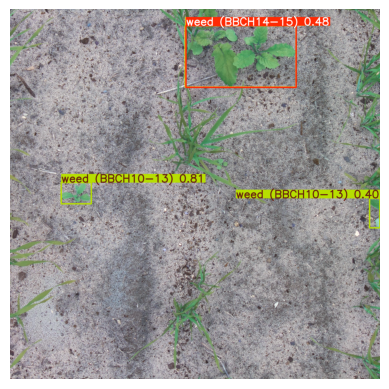

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained YOLO model
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Perform prediction on the image with higher confidence and tuned IoU to reduce overlaps
results = model("/content/drive/MyDrive/weed_dataset_v8/test/images/camden_wheat_radish1_0_11-44-14_crop.jpg", conf=0.2, iou=0.3)  # You can tweak conf/iou if needed

# Get the output image with the predictions overlaid
output_image = results[0].plot()  # This will give you the image with detections

# Convert the numpy array to a PIL Image
output_image_pil = Image.fromarray(output_image)

# Resize the image to a medium size (e.g., 1200x1200)
output_image_pil = output_image_pil.resize((1200, 1200))

# Use matplotlib to display the image correctly in a Jupyter notebook
plt.imshow(output_image_pil)
plt.axis('off')  # Hide axis labels for clarity
plt.show()


# Inferencing on vedio input for Yolov11x

In [ ]:
#Class detection code in video

import cv2
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO(r"/content/runs/detect/train3/weights/best.pt")

# Open the video file
input_video_path = r"/content/weed.mp4"
cap = cv2.VideoCapture(input_video_path)

# Get video information (frame width, height, and FPS)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to save the processed video
output_video_path = "/content/output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for saving output video
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

frame_count = 0  # To track the number of frames processed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform prediction on the current frame
    results = model(frame)

    # Get the output frame with the predictions overlaid
    output_frame = results[0].plot()  # This gives you the frame with detections

    # Write the frame to the output video
    out.write(output_frame)

    frame_count += 1
    # Print progress in the terminal
    print(f"Processing frame {frame_count}...", end='\r')

# Release the video capture and writer objects
cap.release()
out.release()

print("\nVideo processing complete!")
print(f"Processed video saved as {output_video_path}")


0: 640x384 (no detections), 76.2ms
Speed: 3.0ms preprocess, 76.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 1...
0: 640x384 (no detections), 61.4ms
Speed: 3.3ms preprocess, 61.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 2...
0: 640x384 (no detections), 36.0ms
Speed: 3.5ms preprocess, 36.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 3...
0: 640x384 (no detections), 35.0ms
Speed: 2.9ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 4...
0: 640x384 (no detections), 35.0ms
Speed: 2.0ms preprocess, 35.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 5...
0: 640x384 (no detections), 36.4ms
Speed: 1.8ms preprocess, 36.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 6...
0: 640x384 1 weed (BBCH52-62), 35.9ms
Speed: 2.6ms preprocess, 35.9ms infer

In [ ]:
### timming of video
####processing time
###meomary
###processed meomary

##frame count total
##output json
##fps

##inference in this machine

####summary

# Benchmarking of YOLOv11 models

In [ ]:
import torch
from ultralytics.utils.benchmarks import benchmark

# Check CUDA availability and device count
print(f"CUDA is available: {torch.cuda.is_available()}")
print(f"Number of CUDA devices: {torch.cuda.device_count()}")

# If CUDA is available, use the first device (device 0)
# Otherwise, fall back to CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Benchmark on the selected device
benchmark(
    model="/content/drive/MyDrive/yolov11n_results_on_weed/train/weights/best.pt",
    data="/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml",
    imgsz=640,
    half=True,
    device=device,  # Use the selected device
)

Setup complete ✅ (2 CPUs, 12.7 GB RAM, 46.7/112.6 GB disk)

Benchmarks complete for /content/drive/MyDrive/yolov11n_results_on_weed/train/weights/best.pt on /content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml at imgsz=640 (418.75s)
Benchmarks legend:  - ✅ Success  - ❎ Export passed but validation failed  - ❌️ Export failed
                   Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)     FPS
0                 PyTorch       ✅        5.2              0.7112                  29.78   33.57
1             TorchScript       ✅       10.4              0.6805                  14.45    69.2
2                    ONNX       ✅        5.1               0.681                  17.25   57.97
3                OpenVINO       ❌        0.0                   -                      -       -
4                TensorRT       ✅        9.0              0.6809                   5.02  199.04
5                  CoreML       ❌        0.0                   -                      -       -
6  

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,5.2,0.7112,29.78,33.57
1,TorchScript,✅,10.4,0.6805,14.45,69.20
2,ONNX,✅,5.1,0.6810,17.25,57.97
3,OpenVINO,❌,0.0,NaN,NaN,NaN
4,TensorRT,✅,9.0,0.6809,5.02,199.04
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN


In [ ]:
import torch
from ultralytics.utils.benchmarks import benchmark

# Check CUDA availability and device count
print(f"CUDA is available: {torch.cuda.is_available()}")
print(f"Number of CUDA devices: {torch.cuda.device_count()}")

# If CUDA is available, use the first device (device 0)
# Otherwise, fall back to CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Benchmark on the selected device
benchmark(
    model="/content/drive/MyDrive/yolov11m_results_on_weed/train/weights/best.pt",
    data="/content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml",
    imgsz=640,
    half=True,
    device=device,  # Use the selected device
)

Setup complete ✅ (2 CPUs, 12.7 GB RAM, 47.0/112.6 GB disk)

Benchmarks complete for /content/drive/MyDrive/yolov11m_results_on_weed/train/weights/best.pt on /content/drive/MyDrive/weed_dataset_v8/weed_v8.yaml at imgsz=640 (750.96s)
Benchmarks legend:  - ✅ Success  - ❎ Export passed but validation failed  - ❌️ Export failed
                   Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)    FPS
0                 PyTorch       ✅       38.6              0.6728                  38.53  25.95
1             TorchScript       ✅       77.1              0.6631                  21.38  46.77
2                    ONNX       ✅       38.4              0.6646                  52.79  18.94
3                OpenVINO       ❌        0.0                   -                      -      -
4                TensorRT       ✅       41.6              0.6654                  11.96   83.6
5                  CoreML       ❌        0.0                   -                      -      -
6   Tensor

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,38.6,0.6728,38.53,25.95
1,TorchScript,✅,77.1,0.6631,21.38,46.77
2,ONNX,✅,38.4,0.6646,52.79,18.94
3,OpenVINO,❌,0.0,NaN,NaN,NaN
4,TensorRT,✅,41.6,0.6654,11.96,83.60
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN
